# Supervised Incremental Improvements

6/28/2023

Datasets:
For each, a train, validation, and test set
- Pure synthetic data
- Noisy synthetic data
- Labelled observed data (APOGEE)
- Labelled observed data (GAIA)

In [8]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import random
import csv

wave_grid = np.load('/arc/home/wiltonfs/StarNet_SS/data/gaia_wavegrid.npy')

data_dir = 'datasets/'

label_keys = ['teff', 'feh', 'logg', 'alpha']

In [9]:
# Adding noise
def add_gaussian_noise(spectra, mean=0, std=0.07):
    """
    Add Gaussian noise to the spectra.

    Args:
        spectra (numpy.ndarray): Array of spectra.
        mean (float): Mean of the Gaussian noise. Default is 0.
        std (float): Standard deviation of the Gaussian noise. Default is 0.07.

    Returns:
        numpy.ndarray: Spectra with added Gaussian noise.
    """
    noise = np.random.normal(mean, std, size=spectra.shape)
    augmented_spectra = spectra + noise
    return augmented_spectra

#Function for graphing a spectra
def graph(spectra, color='forestgreen', title=''):
    plt.figure(figsize=(30,2))
    plt.plot(wave_grid, spectra, color=color)
    plt.ylim(0, 1.2)
    plt.title(title)
    plt.show()

## Synthetic Data

In [3]:
# Import Synthetic data
path_syn = '/arc/home/wiltonfs/StarNet_SS/data/gaia_grid.h5'

with h5py.File(path_syn, 'r') as f:
    spectra = f['spectra train'][:]
    teff = f['teff train'][:]
    logg = f['logg train'][:]
    alpha = f['alpha train'][:]
    feh = f['feh train'][:]
    
    test_spec = f['spectra val'][:]
    test_teff = f['teff val'][:]
    test_logg = f['logg val'][:]
    test_alpha = f['alpha val'][:]
    test_feh = f['feh val'][:]
    
print('The original synthetic training set consists of %i spectra.' % (len(spectra)))
print('The original synthetic validation set consists of %i spectra.' % (len(test_spec)))

The original synthetic training set consists of 48373 spectra.
The original synthetic validation set consists of 3000 spectra.


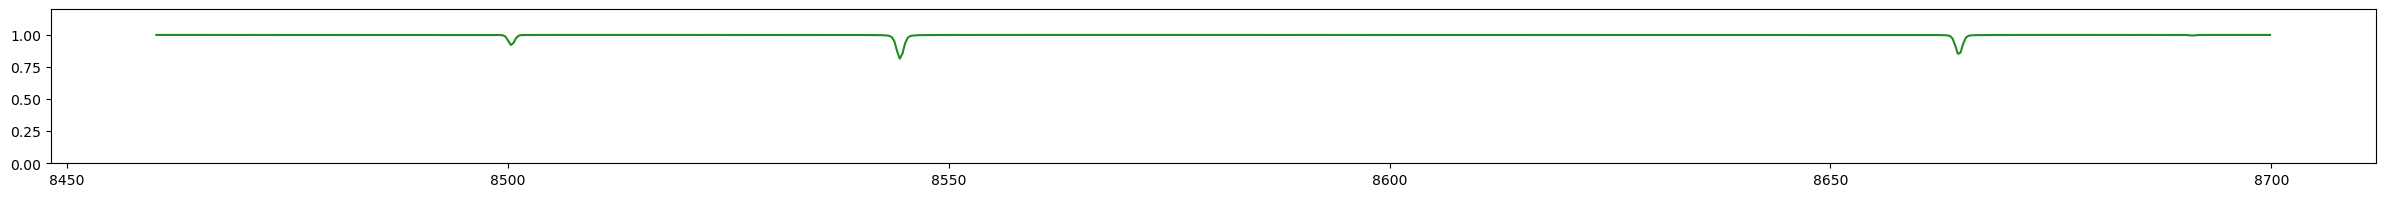

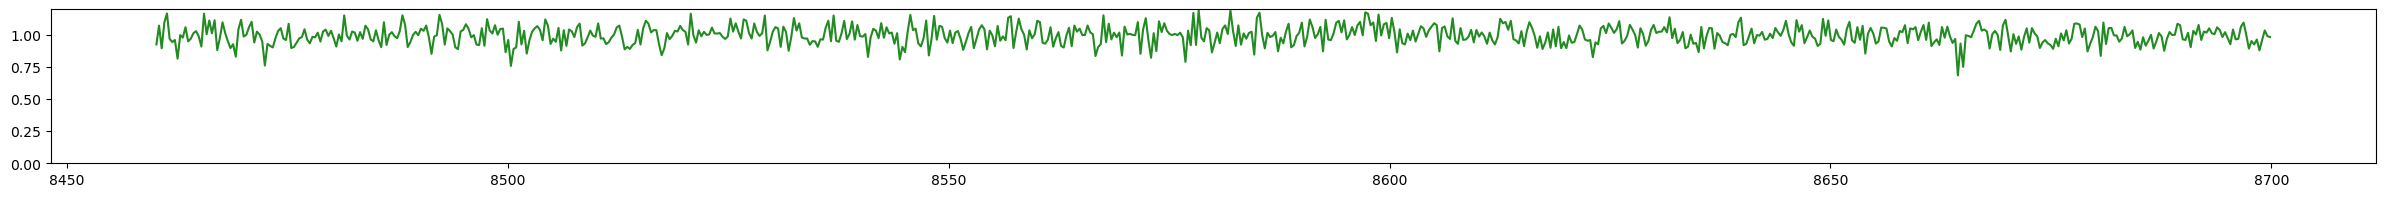

In [4]:
# Train/Validate split
validation_count = 3000
indexes = list(range(len(spectra)))
random.seed(12)
random.shuffle(indexes)

train_spec = []
train_teff = []
train_logg = []
train_alpha = []
train_feh = []

val_spec = []
val_teff = []
val_logg = []
val_alpha = []
val_feh = []

count = 0
for index in indexes:
    if count < validation_count:
        # Add to validation
        val_spec.append(spectra[index])
        val_teff.append(teff[index])
        val_logg.append(logg[index])
        val_alpha.append(alpha[index])
        val_feh.append(feh[index])
    else:
        # Add to train
        train_spec.append(spectra[index])
        train_teff.append(teff[index])
        train_logg.append(logg[index])
        train_alpha.append(alpha[index])
        train_feh.append(feh[index])
    
    count += 1

# Convert to NumPy arrays
train_spec = np.array(train_spec)
val_spec = np.array(val_spec)
test_spec = np.array(test_spec)

# Add noise
train_spec_noise = add_gaussian_noise(train_spec)
val_spec_noise = add_gaussian_noise(val_spec)
test_spec_noise = add_gaussian_noise(test_spec)

graph(train_spec[13])
graph(train_spec_noise[13])


In [5]:
clean_name = 'synth_clean.h5'
noised_name = 'synth_noised.h5'

with h5py.File(data_dir + clean_name, 'w') as f:
    section = 'train'
    f.create_dataset('spectra ' + section, data=train_spec)
    f.create_dataset('teff ' + section, data=train_teff)
    f.create_dataset('logg ' + section, data=train_logg)
    f.create_dataset('alpha ' + section, data=train_alpha)
    f.create_dataset('feh ' + section, data=train_feh)
    
    section = 'val'
    f.create_dataset('spectra ' + section, data=val_spec)
    f.create_dataset('teff ' + section, data=val_teff)
    f.create_dataset('logg ' + section, data=val_logg)
    f.create_dataset('alpha ' + section, data=val_alpha)
    f.create_dataset('feh ' + section, data=val_feh)
    
    section = 'test'
    f.create_dataset('spectra ' + section, data=test_spec)
    f.create_dataset('teff ' + section, data=test_teff)
    f.create_dataset('logg ' + section, data=test_logg)
    f.create_dataset('alpha ' + section, data=test_alpha)
    f.create_dataset('feh ' + section, data=test_feh)

with h5py.File(data_dir + noised_name, 'w') as f:
    section = 'train'
    f.create_dataset('spectra ' + section, data=train_spec_noise)
    f.create_dataset('teff ' + section, data=train_teff)
    f.create_dataset('logg ' + section, data=train_logg)
    f.create_dataset('alpha ' + section, data=train_alpha)
    f.create_dataset('feh ' + section, data=train_feh)
    
    section = 'val'
    f.create_dataset('spectra ' + section, data=val_spec_noise)
    f.create_dataset('teff ' + section, data=val_teff)
    f.create_dataset('logg ' + section, data=val_logg)
    f.create_dataset('alpha ' + section, data=val_alpha)
    f.create_dataset('feh ' + section, data=val_feh)
    
    section = 'test'
    f.create_dataset('spectra ' + section, data=test_spec_noise)
    f.create_dataset('teff ' + section, data=test_teff)
    f.create_dataset('logg ' + section, data=test_logg)
    f.create_dataset('alpha ' + section, data=test_alpha)
    f.create_dataset('feh ' + section, data=test_feh)


## Observed GAIA Data

In [10]:
# Import GAIA data
path_gaia = '/arc/home/wiltonfs/StarNet_SS/data/gaia_observed.h5'

with h5py.File(path_gaia, 'r') as f:
    spectra = f['spectra train'][:]
    teff = f['teff train'][:]
    logg = f['logg train'][:]
    alpha = f['alpha train'][:]
    feh = f['feh train'][:]
    
    test_spec = f['spectra val'][:]
    test_teff = f['teff val'][:]
    test_logg = f['logg val'][:]
    test_alpha = f['alpha val'][:]
    test_feh = f['feh val'][:]
    
print('The original observed GAIA training set consists of %i spectra.' % (len(spectra)))
print('The original observed GAIA validation set consists of %i spectra.' % (len(test_spec)))
    

The original observed GAIA training set consists of 867125 spectra.
The original observed GAIA validation set consists of 3000 spectra.


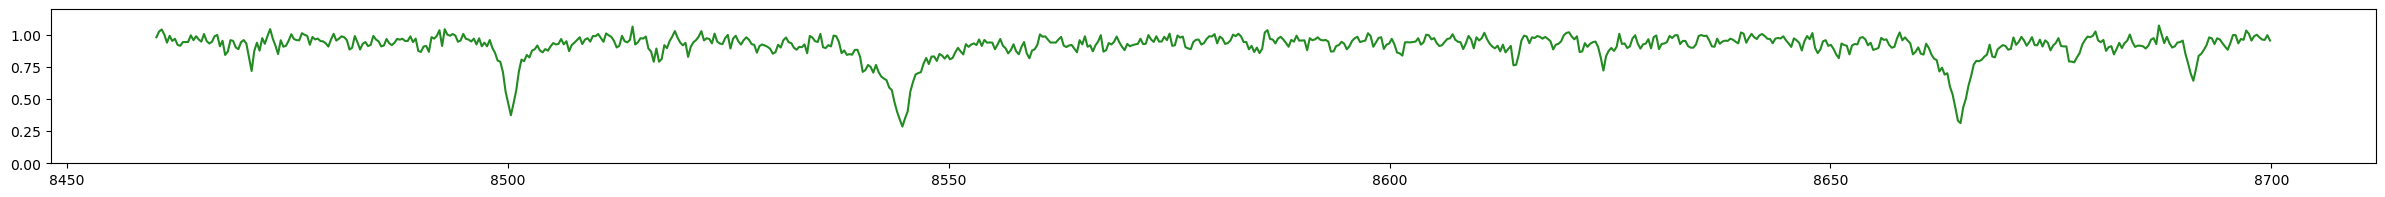

In [12]:
# Train/Validate split
valid_size = 3000
indexes = list(range(len(spectra)))
random.seed(100)
random.shuffle(indexes)

train_spec = []
train_teff = []
train_logg = []
train_alpha = []
train_feh = []

val_spec = []
val_teff = []
val_logg = []
val_alpha = []
val_feh = []

count = 0
for index in indexes:
    # If we are still adding to validation and there are no nan values in spectra, teff, logg, alpha, or feh at index, add it to validation
    if count < valid_size and not np.any(np.isnan(spectra[index])) and not np.any(np.isnan(teff[index])) and not np.any(np.isnan(logg[index])) and not np.any(np.isnan(alpha[index])) and not np.any(np.isnan(feh[index])):
        # Add to validation
        val_spec.append(spectra[index])
        val_teff.append(teff[index])
        val_logg.append(logg[index])
        val_alpha.append(alpha[index])
        val_feh.append(feh[index])
        
        count += 1
    else:
        # Add to train if there are no nan values in spectra, teff, logg, alpha, or feh at index
        if not np.any(np.isnan(spectra[index])) and not np.any(np.isnan(teff[index])) and not np.any(np.isnan(logg[index])) and not np.any(np.isnan(alpha[index])) and not np.any(np.isnan(feh[index])):
            train_spec.append(spectra[index])
            train_teff.append(teff[index])
            train_logg.append(logg[index])
            train_alpha.append(alpha[index])
            train_feh.append(feh[index])

# Convert to NumPy arrays
train_spec = np.array(train_spec)
val_spec = np.array(val_spec)
test_spec = np.array(test_spec)

graph(train_spec[13])

# Print the sizes of each split
print("Size of validation data:", len(val_spec))
print("Size of test data:", len(test_spec))
print("Size of training data:", len(train_spec))


In [14]:
GAIA_name = 'obs_GAIA.h5'

with h5py.File(data_dir + GAIA_name, 'w') as f:
    section = 'train'
    f.create_dataset('spectra ' + section, data=train_spec)
    f.create_dataset('teff ' + section, data=train_teff)
    f.create_dataset('logg ' + section, data=train_logg)
    f.create_dataset('alpha ' + section, data=train_alpha)
    f.create_dataset('feh ' + section, data=train_feh)
    
    section = 'val'
    f.create_dataset('spectra ' + section, data=val_spec)
    f.create_dataset('teff ' + section, data=val_teff)
    f.create_dataset('logg ' + section, data=val_logg)
    f.create_dataset('alpha ' + section, data=val_alpha)
    f.create_dataset('feh ' + section, data=val_feh)
    
    section = 'test'
    f.create_dataset('spectra ' + section, data=test_spec)
    f.create_dataset('teff ' + section, data=test_teff)
    f.create_dataset('logg ' + section, data=test_logg)
    f.create_dataset('alpha ' + section, data=test_alpha)
    f.create_dataset('feh ' + section, data=test_feh)


## Observed APOGEE Data

In [3]:
# Import APOGEE data
path_apogee = '/arc/home/wiltonfs/StarNet_SS/apogee_gaia/overlap_data.csv'
expected_size = 96546
# Load combined file
overlap_data = []
with open(path_apogee, mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        overlap_data.append(row)
overlap_data = np.array(overlap_data[1:], dtype=float)

# Check expected size 
assert len(overlap_data) == expected_size, "Size of overlap_data (" + str(len(overlap_data)) + ") does not match the expected size of " + str(expected_size)

# If the size matches, the program continues execution
print("Size of overlap_data is " + str(len(overlap_data)) + " as expected")

# Remove any row with a nan value
overlap_data = overlap_data[~np.isnan(overlap_data).any(axis=1)]

# Print how many rows removed
print("Number of rows removed:", expected_size - len(overlap_data))

# Set random seed
np.random.seed(0)

# Shuffle the rows of overlap_data, but preserve the data within each row
np.random.shuffle(overlap_data)

# Define the split percentages
validation_count = 3000
test_count = 3000

# Split the data
val_data = overlap_data[:validation_count].astype(float)
test_data = overlap_data[validation_count:validation_count + test_count].astype(float)
train_data = overlap_data[validation_count + test_count:].astype(float)

# Print the sizes of each split
print("Size of validation data:", len(val_data))
print("Size of test data:", len(test_data))
print("Size of training data:", len(train_data))

#["gaia_id", "teff_gaia", "alpha_gaia", "feh_gaia", "logg_gaia", "teff_apogee", "alpha_apogee", "feh_apogee", "logg_apogee"]


Size of overlap_data is 96546 as expected
Number of rows removed: 14123
Size of validation data: 3000
Size of test data: 3000
Size of training data: 76423


In [4]:
# Import needed GAIA data
path_gaia = '/arc/home/wiltonfs/StarNet_SS/data/gaia_observed.h5'
with h5py.File(path_gaia, 'r') as f:
    gaia_spec = f['spectra train'][:]
    gaia_ids = f['source ID train'][:]

In [5]:
train_spec = []
train_teff = []
train_logg = []
train_alpha = []
train_feh = []

val_spec = []
val_teff = []
val_logg = []
val_alpha = []
val_feh = []

test_spec = []
test_teff = []
test_logg = []
test_alpha = []
test_feh = []

for row in train_data:
    gaia_index = np.where(gaia_ids == row[0])[0][0]
    
    train_spec.append(gaia_spec[gaia_index])
    train_teff.append(row[5])
    train_logg.append(row[8])
    train_alpha.append(row[6])
    train_feh.append(row[7])
    
for row in val_data:
    gaia_index = np.where(gaia_ids == row[0])[0][0]
    
    val_spec.append(gaia_spec[gaia_index])
    val_teff.append(row[5])
    val_logg.append(row[8])
    val_alpha.append(row[6])
    val_feh.append(row[7])
    
for row in test_data:
    gaia_index = np.where(gaia_ids == row[0])[0][0]
    
    test_spec.append(gaia_spec[gaia_index])
    test_teff.append(row[5])
    test_logg.append(row[8])
    test_alpha.append(row[6])
    test_feh.append(row[7])

# Convert to NumPy arrays
train_spec = np.array(train_spec)
val_spec = np.array(val_spec)
test_spec = np.array(test_spec)

graph(test_spec[13])

NameError: name 'graph' is not defined

In [6]:
APOGEE_name = 'obs_APOGEE.h5'

with h5py.File(data_dir + APOGEE_name, 'w') as f:
    section = 'train'
    f.create_dataset('spectra ' + section, data=train_spec)
    f.create_dataset('teff ' + section, data=train_teff)
    f.create_dataset('logg ' + section, data=train_logg)
    f.create_dataset('alpha ' + section, data=train_alpha)
    f.create_dataset('feh ' + section, data=train_feh)
    
    section = 'val'
    f.create_dataset('spectra ' + section, data=val_spec)
    f.create_dataset('teff ' + section, data=val_teff)
    f.create_dataset('logg ' + section, data=val_logg)
    f.create_dataset('alpha ' + section, data=val_alpha)
    f.create_dataset('feh ' + section, data=val_feh)
    
    section = 'test'
    f.create_dataset('spectra ' + section, data=test_spec)
    f.create_dataset('teff ' + section, data=test_teff)
    f.create_dataset('logg ' + section, data=test_logg)
    f.create_dataset('alpha ' + section, data=test_alpha)
    f.create_dataset('feh ' + section, data=test_feh)


## Checking Everything Went Well

In [15]:
check_path = 'datasets/'
datasets = ['synth_clean', 'synth_noised', 'obs_GAIA', 'obs_APOGEE']

sub_sets = ['train', 'val', 'test']

for dataset in datasets:
    print(dataset + ":")
    with h5py.File(os.path.join(check_path, dataset+'.h5'), 'r') as f:
        for sub_set in sub_sets:
            spectra = f['spectra ' + sub_set][:]
            
            teff = f['teff ' + sub_set][:]
            logg = f['logg ' + sub_set][:]
            alpha = f['alpha ' + sub_set][:]
            feh = f['feh ' + sub_set][:]
            print("\t" + sub_set + " has length of " + str(len(spectra)))
            #All should have same lengths
            assert len(spectra) == len(teff) == len(logg) == len(alpha) == len(feh), "" + sub_set + " set in " + dataset + " has unequal lengths"
            
            

synth_clean:
	train has length of 45373
	val has length of 3000
	test has length of 3000
synth_noised:
	train has length of 45373
	val has length of 3000
	test has length of 3000
obs_GAIA:
	train has length of 166903
	val has length of 3000
	test has length of 3000
obs_APOGEE:
	train has length of 76423
	val has length of 3000
	test has length of 3000
